### 1. 선형 모델

선형 모델은 100여 년 전에 개발되었고, 지난 몇십 년 동안 폭넓게 연구되고 현재도 널리 쓰인다. 

### 회귀의 선형모델


y = w[0] x x[0] + w[1] x x[1] + ... + w[p] x x[p] + b

이 식에서 x[0]부터 x[p]까지는 하나의 데이터 포인트에 대한 특성을 나타낸다. <br>
특성의 개수는 p+1 개<br>
w는 기울기로 그냥 상수 한개!<br>
w와 b는 모델이 학습할 파라미터 입니다.<br><br><br> 

w[0]은 기울기이며, b는 y축과 만나는 절편이다. 특성이 많아지면 w는 각 특성에 해당하는 모든 기울기를 가진다. <br>

그리고 y은 모델이 만들어낸 예측값입니다. 특성이 하나인 데이터셋이라면 이 식은 다음과 같아집니다. <br>

예측과 훈련 세트에 있는 타깃 y <br>

y = w[0] x x[0] + b

w[0]는 기울기, b는 y축과 만나는 절편

w[0]: 0.393906  b: -0.031804


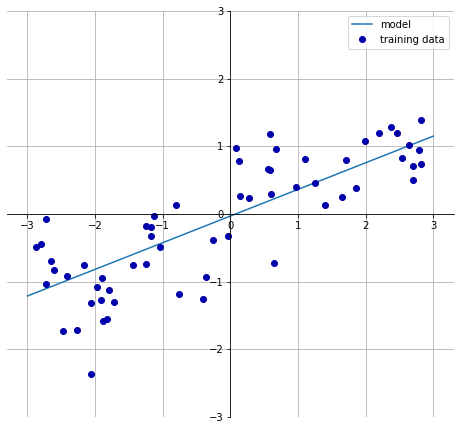

In [8]:
import mglearn

mglearn.plots.plot_linear_regression_wave()

### 1) 선형회귀 (최소 제곱법) (LinearRegression)

평균제곱 오차를 최소화하는 w와 b를 찾는다! 예측값과 타깃값의 차이를 제곱해서 더한 후에 샘플의 개수로 나눈 것! 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

기울기 파라미터(w)는 가중치 또는 계수라고 하며, lr객체의 coef_ 속성에 저장되어 있고, <br>
편향 또는 절편 파라미터 (b)는 intercept_ 속성에 저장되어있다. 

In [15]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


? 왜 intercept_ 속성은 항상 실수값 하나인거지? coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열이다. <br>
→ intercept_는 b y절편이고, coef_는 Numpy배열이다. 이거는 p+1개의 특성이 존재한다는 가정하에 그렇다. 

In [16]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


? R^2 값이 0.66인 것은 그리 좋은 결과가 아닙니다. 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷한 것을 알 수 있다. 이건 과대적합이 아니라 과소적합인 상태를 의미한다. 1차원 데이터 셋ㅇ에서는 모델이 매우 단순하다. 그래서 과대적합을 걱정할 필요는 없다. 특성이 많은 고차원 데이터 셋에서는 선형 모델의 성능이 매우 높아져서 과대적합이 될 가능성이 높다. LinearRegression 모델이 보스턴 주택가격 데이터셋과 같은 복잡한 데이터셋에서 어떻게 동작할까!

In [17]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [18]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 2) 릿지 회귀


In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수 : 0.75


? 과대적합, 과소적합 무슨 의미이지??? <br>
? 과소적합은 너무 단순해서! <br>
? 과대적합은 특성이 많아지고, 데이터량이 많아지면서? <br> 
? 적당한 특성과 적당한 데이터 포인트량이 중요한 것인가? <br>

In [27]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [30]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


# 폰트 설정

In [34]:
### 폰트

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)


NanumGothic


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


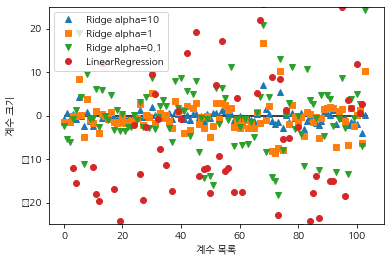

In [36]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
       
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


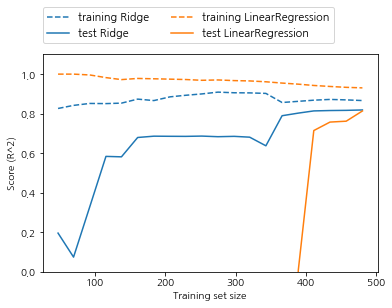

In [37]:
mglearn.plots.plot_ridge_n_samples()

In [22]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [24]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [25]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


NameError: name 'ridge01' is not defined

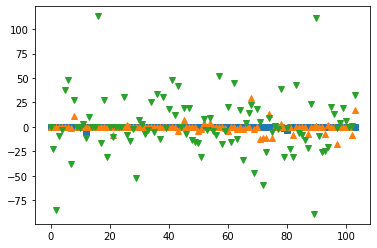

In [26]:
import matplotlib.pyplot as plt

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))

### 분류용 선형 모델

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AttributeError: type object 'LinearSVC' has no attribute 'name__'

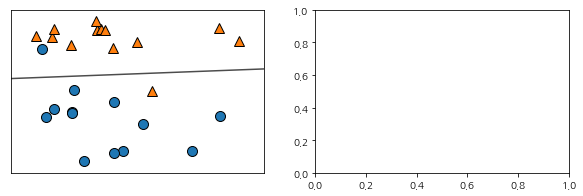

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()